In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout,Flatten,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools


In [2]:
# Check if GPU is available
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU is available.")
else:
    print("GPU is not available. Using CPU.")

def create_model(input_shape, num_classes):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 4
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 6
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening Layer
    model.add(Flatten())

    # Fully Connected Layers (3 Dense Layers)
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (256, 256, 3)  
num_classes = 3  # Number of classes

# Create the model
model = create_model(input_shape, num_classes)

# Model Checkpoint Callback
checkpoint_path = "apple_leaf_disease_custom_cnn_V3.keras"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')

# Print model summary
model.summary()



GPU is not available. Using CPU.


C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,16

 Total params: 18,490,403 (70.54 MB)

 Trainable params: 18,484,387 (70.51 MB)

 Non-trainable params: 6,016 (23.50 KB)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

f_name = "D:\DETS\Processed5_dataset"
m = 256
n = 256

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(f_name,"train"),  # Path t   o training data
    target_size=(m,n),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
     os.path.join(f_name,"validation"),  # Path to validation data
    target_size=(m,n),
    batch_size=20,
    class_mode='categorical'
)


Found 3749 images belonging to 3 classes.
Found 1249 images belonging to 3 classes.


<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\koush\AppData\Local\Temp\ipykernel_23752\2978829824.py:12: SyntaxWarning: invalid escape sequence '\D'
  f_name = "D:\DETS\Processed5_dataset"


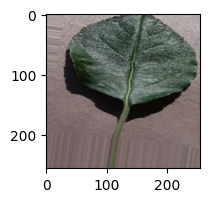

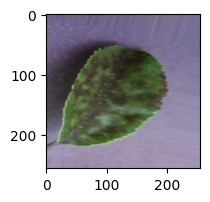

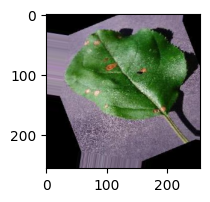

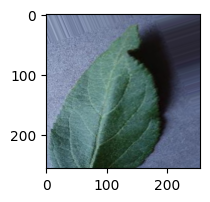

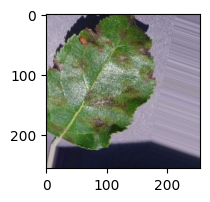

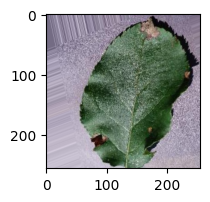

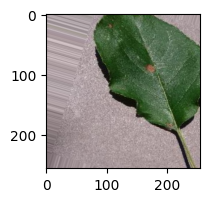

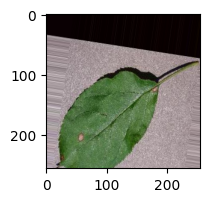

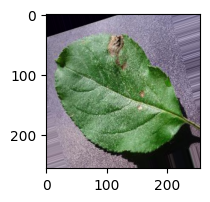

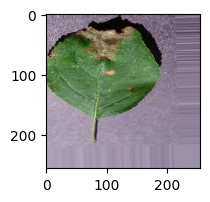

In [4]:
images , lable = next(train_generator)

for i in range(10):
 plt.figure(figsize=(2, 2))
 plt.imshow((images[i]*255 ).astype(np.uint8))
 plt.show()

In [18]:
# Train the model with the callback
history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[checkpoint])



Epoch 1/30
188/188 [==============================] - 56s 265ms/step - loss: 2.5936 - accuracy: 0.6922 - val_loss: 3.3765 - val_accuracy: 0.2634
Epoch 2/30
188/188 [==============================] - 49s 261ms/step - loss: 0.9410 - accuracy: 0.7551 - val_loss: 1.2056 - val_accuracy: 0.3155
Epoch 3/30
188/188 [==============================] - 50s 263ms/step - loss: 0.4423 - accuracy: 0.8458 - val_loss: 0.4653 - val_accuracy: 0.8038
Epoch 4/30
188/188 [==============================] - 52s 277ms/step - loss: 0.4055 - accuracy: 0.8616 - val_loss: 1.5531 - val_accuracy: 0.5965
Epoch 5/30
188/188 [==============================] - 50s 266ms/step - loss: 0.3579 - accuracy: 0.8757 - val_loss: 0.2255 - val_accuracy: 0.9263
Epoch 6/30
188/188 [==============================] - 45s 240ms/step - loss: 0.3053 - accuracy: 0.8890 - val_loss: 0.2743 - val_accuracy: 0.8927
Epoch 7/30
188/188 [==============================] - 44s 234ms/step - loss: 0.5989 - accuracy: 0.8346 - val_loss: 1.1271 - val_ac

In [20]:
# Load the best model
model.load_weights(checkpoint_path)

In [27]:
 # Test the model on unseen data
test_generator = test_datagen.flow_from_directory(
    os.path.join(f_name,"test"),  # Path to test data
    target_size=(m,n),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


Found 580 images belonging to 3 classes.
19/19 [==============================] - 6s 133ms/step - loss: 0.1825 - accuracy: 0.9362
Test Accuracy: 0.94


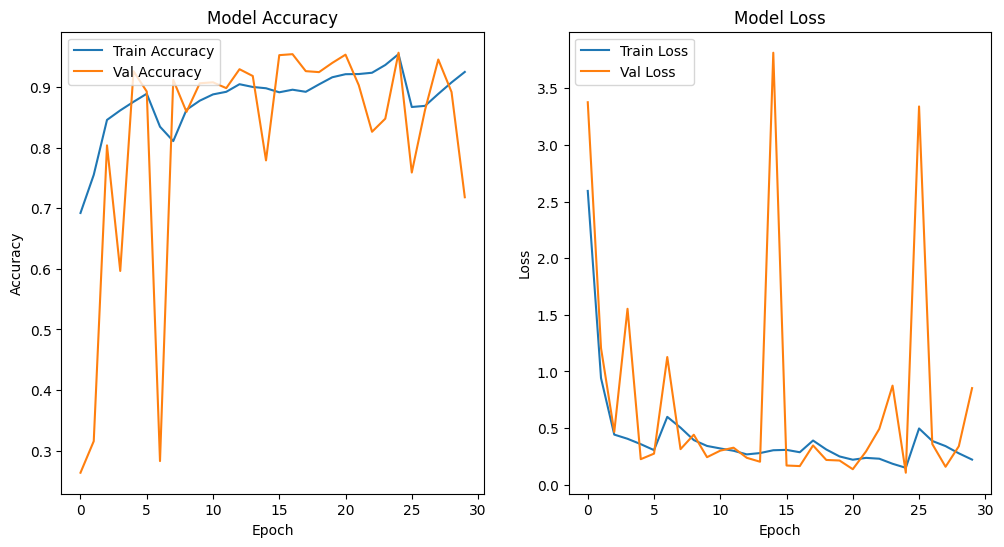

1251/1251 [==============================] - 7s 6ms/step


<Figure size 800x600 with 0 Axes>

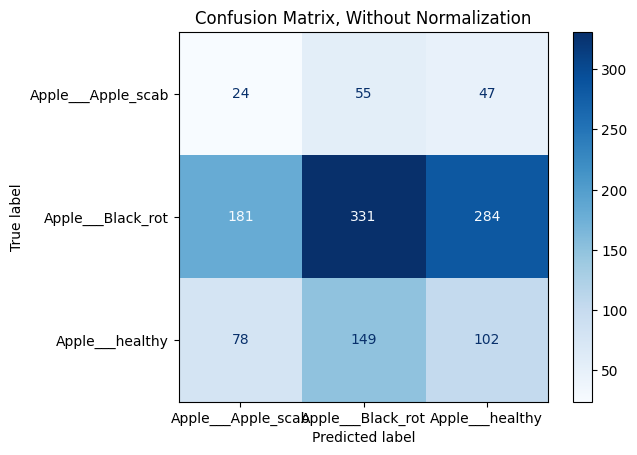

<Figure size 800x600 with 0 Axes>

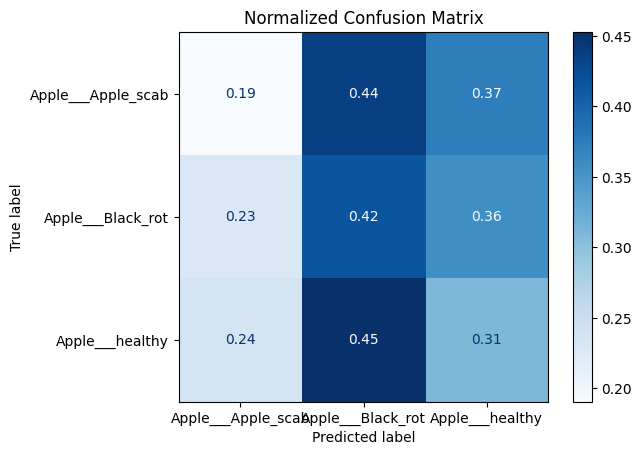

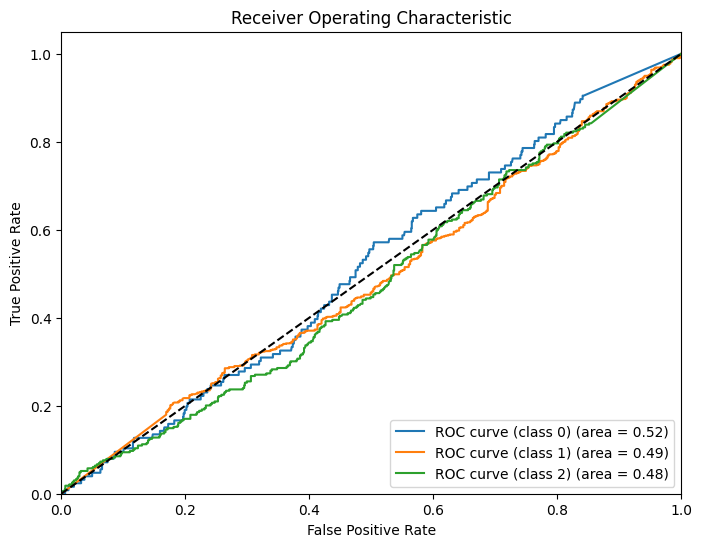

In [23]:
#### Plot Training History
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.show()

plot_training_history(history)

# Generate Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix, Without Normalization'

    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
    plt.title(title)
    plt.show()

# Predict test data
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = list(test_generator.class_indices.keys())

plot_confusion_matrix(y_true, y_pred_classes, class_names, normalize=False)
plot_confusion_matrix(y_true, y_pred_classes, class_names, normalize=True)

# ROC Curve for each class
def plot_roc_curve(y_true, y_pred, num_classes):
    y_true_bin = label_binarize(y_true, classes=[i for i in range(num_classes)])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_true, y_pred, num_classes)


In [14]:
model.weights

[<KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=sequential_2/conv2d_8/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential_2/conv2d_8/bias>,
 <KerasVariable shape=(3, 3, 32, 64), dtype=float32, path=sequential_2/conv2d_9/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_2/conv2d_9/bias>,
 <KerasVariable shape=(3, 3, 64, 128), dtype=float32, path=sequential_2/conv2d_10/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=sequential_2/conv2d_10/bias>,
 <KerasVariable shape=(3, 3, 128, 256), dtype=float32, path=sequential_2/conv2d_11/kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=sequential_2/conv2d_11/bias>,
 <KerasVariable shape=(50176, 128), dtype=float32, path=sequential_2/dense/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=sequential_2/dense/bias>,
 <KerasVariable shape=(128, 3), dtype=float32, path=sequential_2/dense_1/kernel>,
 <KerasVariable shape=(3,), dtype=float32, path=sequential_2/dense_1/bias>]

In [22]:
# Test the model on unseen data
test_generator = test_datagen.flow_from_directory(
    os.path.join(r"C:\Users\works\OneDrive\Desktop\DETS\Processed5_dataset\test"),  # Path to test data
    target_size=(m,n),
    batch_size=1,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

Found 1251 images belonging to 3 classes.
1251/1251 [==============================] - 9s 7ms/step - loss: 0.9497 - accuracy: 0.7090
Test Accuracy: 0.71


   6/1251 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step  

C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1251/1251 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


<Figure size 800x600 with 0 Axes>

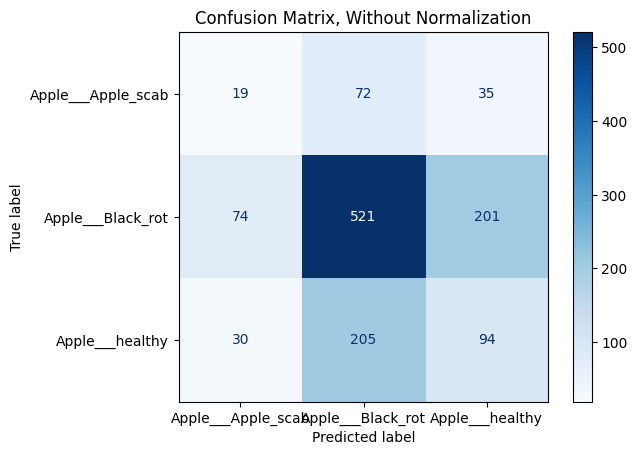

<Figure size 800x600 with 0 Axes>

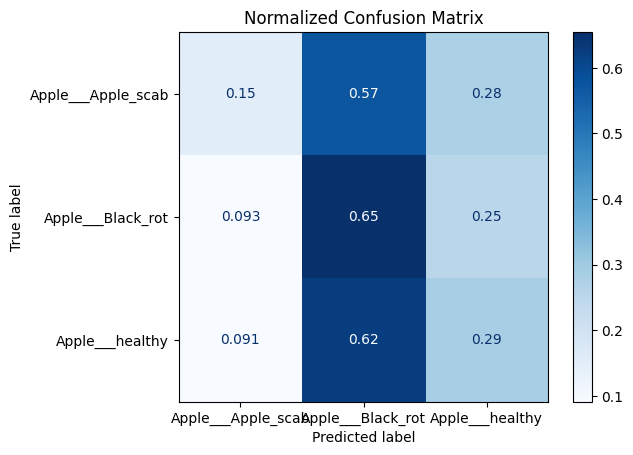

In [7]:
# Generate Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix, Without Normalization'

    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
    plt.title(title)
    plt.show()

# Predict test data
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = list(test_generator.class_indices.keys())

plot_confusion_matrix(y_true, y_pred_classes, class_names, normalize=False)
plot_confusion_matrix(y_true, y_pred_classes, class_names, normalize=True)
